```
```
```
```
# **ESB2025** **/ AI Based Shape Representation /** **Hands-On Session**
```
```
```
```



---

**Welcome to the Hands-On Session!**

In the first hour of the pre-course "AI-based shape representation", we briefly introduced shape representation and fundamental deep learning (DL) approaches. This foundation set the stage for exploring more advanced DL techniques—such as foundation models—and has hopefully prepared you for this hands-on session.

As mentioned earlier, segmentation is a key component of shape representation. In this session, you will have the opportunity to segment hand bones from X-ray images using our PedVision model, which is primarily based on a visual foundation model (VFM). You will also compare its performance with benchmark models such as U-Net, DeepLabV3+, and SegFormer. Additionally, you will assess the impact of noise and motion artifacts on segmentation quality.

You can revisit this Colab page anytime and work at your own pace. If you have any questions about the pipeline or exercises, please feel free to reach out via our website **BBioX** (https://bbiox.github.io/index.html) or reach out to one of our group members: \

Nazli Tumer: n.tumer-1@tudelft.nl. \
Edwin Tay:  E.W.S.Tay@tudelft.nl\
Morteza Homayounfar: m.homayounfar@tudelft.nl \

---



---

**Brief Overview: 2D PedVision Model**

One of our recently proposed DL (VFM)-based models is PedVision, a manual-annotation-free and age-scalable segmentation pipeline designed for bone analysis in hand X-ray images.

The figure below illustrates the main components of the pipeline and the data flow. PedVision consists of four key elements:

**(1)** A Visual Foundation Model (VFM),

**(2)** A Region of Interest (ROI) network,

**(3)** An Instance Classifier (IC) network, and

**(4)** A Human Discriminator.

The VFM transforms pixel-level data into meaningful instances, such as bone segmentation masks. The ROI and IC networks supervise the inputs and outputs of the VFM. Specifically, the ROI network isolates regions containing only hand bones to prepare input for the VFM, while the IC network classifies the VFM-generated instances into five classes: four hand bone types (metacarpals, proximal, middle, and distal phalanges) and an irrelevant instances class.

These networks were trained and fine-tuned over multiple rounds using an initial dataset with limited annotations. By leveraging the VFM at the pipeline’s core, PedVision reduces the need for extensive annotated datasets, significantly easing the burden on human annotators. Instead, the human discriminator assists by approving or rejecting segmentations predicted by the VFM on new images, helping to enrich the training data for the ROI and IC networks with minimal effort.

**Full details about PedVision** are provided in our forthcoming article, which is currently under peer review and expected to be published online soon with extended content. In the meantime, we invite you to refer to the current version available on SSRN: https://dx.doi.org/10.2139/ssrn.5050535.


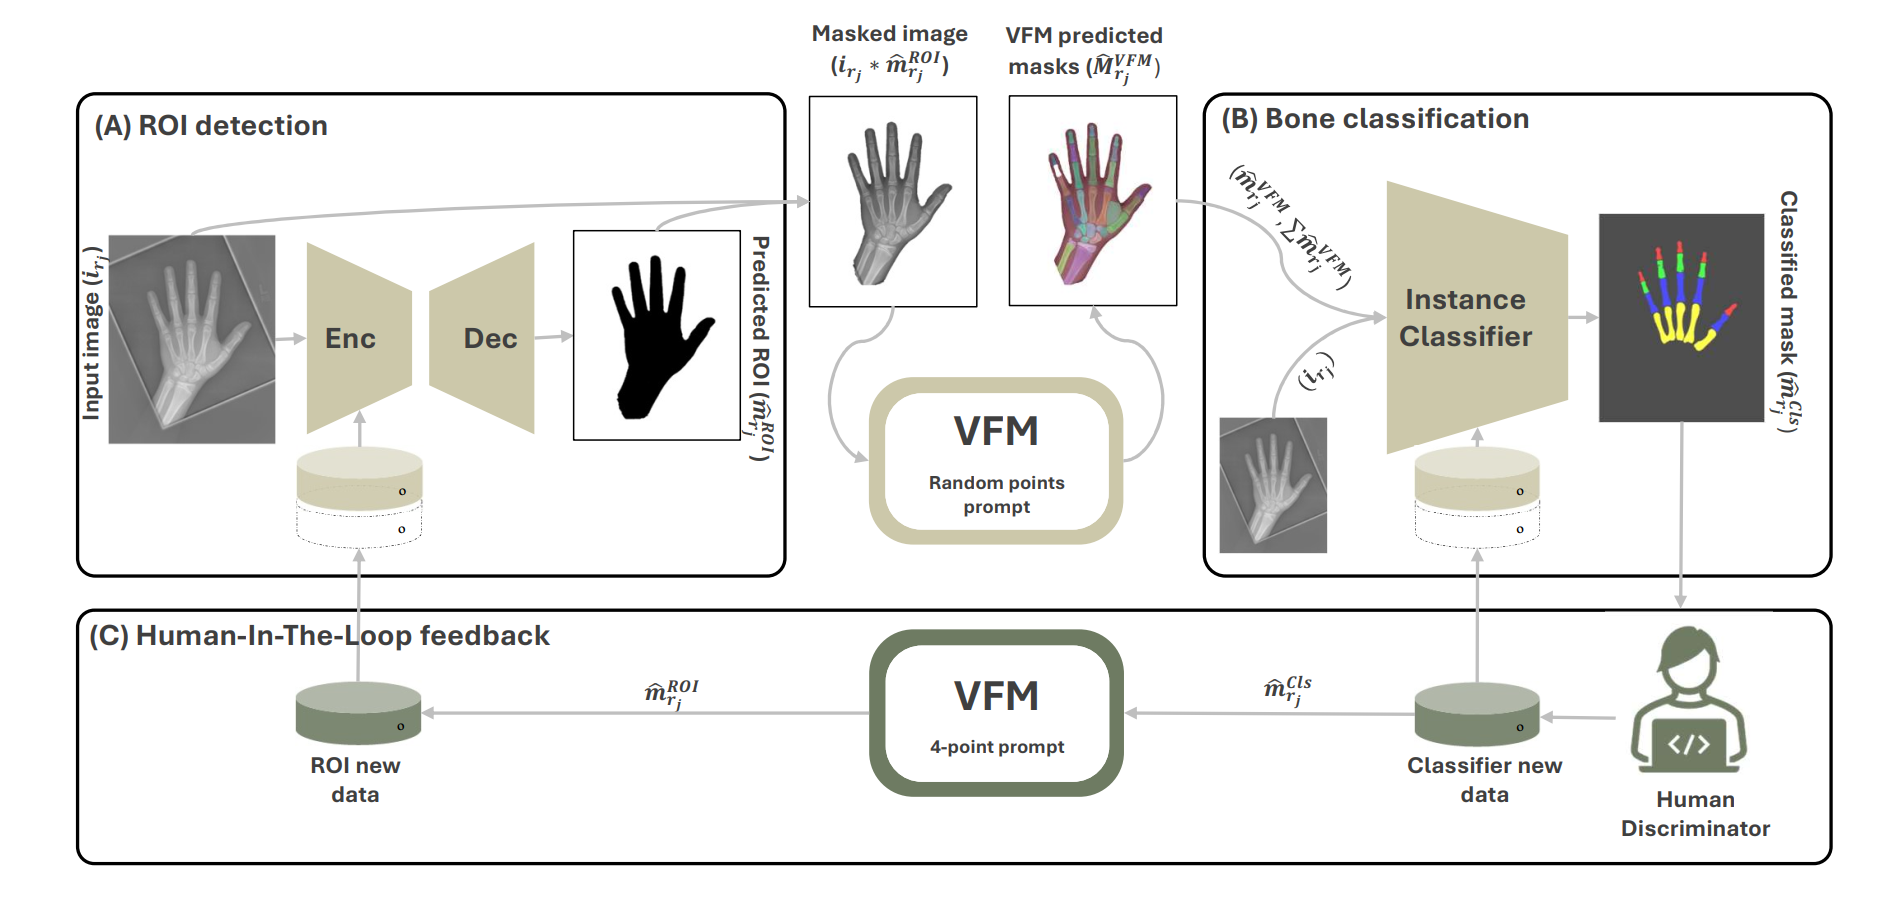

```
```
### **1. Cloning and Installation**

Let's start experimenting!

In the first hour of the pre-course, you were shortly introduced to Git, GitHub, and some essential GitHub commands. Now, you will see one practical example: cloning a repository from GitHub.

Before proceeding with the experiments, you will first need to **clone the PedVision repository** and **install the required PyTorch-based segmentation models**.


```
```

In [ ]:
!git clone --branch ESB25_workshop_AI4shp https://github.com/mohofar/PedVision.git

Cloning into 'PedVision'...
remote: Enumerating objects: 737, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 737 (delta 73), reused 63 (delta 40), pack-reused 628 (from 4)
Receiving objects: 100% (737/737), 142.72 MiB | 16.88 MiB/s, done.
Resolving deltas: 100% (311/311), done.


In [ ]:
cd PedVision

/content/PedVision


In [ ]:
!pip install segmentation-models-pytorch==0.4.0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.3/121.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

```
```
### **2. PedVision (VFM-Based Model) Experiments**

In this section, you will use the PedVision model to semantically segment hand bones - specifically metacarpals and the proximal, middle, and distal phalanges - from X-ray images.

Start by evaluating PedVision's performance on clean (original) X-ray images without any added noise. Then, experiment by adding varying levels of noise to the same images and observe how the segmentation results change.

**What differences do you notice in performance as noise increases?**

```
```

---
---
**STEP 2.1: Model Setup**

> Run the code cell below (Step 2.1) to set up the folder structure and import the necessary components (trained weights) of the **PedVision**. (You may want to review the section titled **"Brief Overview:PedVision Model"** for context.) This includes the **ROI network**, **IC network**, and the **VFM**.

> For this exercise, we will use the **Segment Anything Model (SAM)** [1], which was trained on an extensive dataset of 11 million images and over 1 billion masks. In the first hour of the pre-course, we briefly discussed how SAM works. Here, we will use its largest variant, **ViT-H**, which comes with pre-trained weights.

> The VFM model includes several parameters that can be adjusted by the user. In this exercise, we use:

> * A grid of 32×32 points over the images,
* An IoU prediction threshold of 0.9,
* A stability score threshold of 0.9, and
* All other settings remain at the default values provided by the SAM model.

> To better understand these parameters and how they influence the model’s behavior, we encourage you to consult references [1, 2].

>**References**

> **[1]** Kirillov, A., et al. Segment anything. in Proceedings of the IEEE/CVF International Conference on Computer Vision. 2023. \
**[2]** https://github.com/facebookresearch/segment-anything.

---
---

In [ ]:
''' Step2.1: Prepare the folder structure and download weights'''

!python PedVisionCode/main.py --foldering y
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -P PedVisionCode/saved_models
!wget "https://www.dropbox.com/scl/fi/7kzywiswmslrfmlgcp6vo/ROI_model_R11.pth?rlkey=idpqozialittcri90us2hy1vc&st=usq0igej&dl=1" -O PedVisionCode/saved_models/ROI_model_R11.pth
!wget "https://www.dropbox.com/scl/fi/5p9zymm76fnhj95grmq73/CLS_model_R11.pth?rlkey=urzxlrjrsq1du397za8vucpvy&st=n3fktzg7&dl=1" -O PedVisionCode/saved_models/CLS_model_R11.pth

--2025-07-02 10:02:56--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.96, 3.163.189.51, 3.163.189.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘PedVisionCode/saved_models/sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   189MB/s    in 12s     

2025-07-02 10:03:08 (211 MB/s) - ‘PedVisionCode/saved_models/sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]

--2025-07-02 10:03:08--  https://www.dropbox.com/scl/fi/7kzywiswmslrfmlgcp6vo/ROI_model_R11.pth?rlkey=idpqozialittcri90us2hy1vc&st=usq0igej&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response...


---
---
**STEP 2.2: Visualizing an X-Ray Image**

> Run the code cell below (Step 2.2) to plot an X-ray image of your choice.

> In the **PedVisionCode/test-data/input folder** (located under the main PedVision directory), you will find several example images. To browse the folder and view available filenames, click on the folder icon on the far left panel in Colab. You should see 4 JPG images in that folder.

> You can choose to plot any of these images, try all of them, or -later at home- import your own hand X-ray image, such as one that can be downloaded from an open dataset (e.g., the Radiological Society of North America - RSNA Dataset) [1].

> **References**

> **[1]** Halabi, S.S., et al., The RSNA pediatric bone age machine learning challenge. Radiology, 2019. 290(2): p. 498-503.

---
---


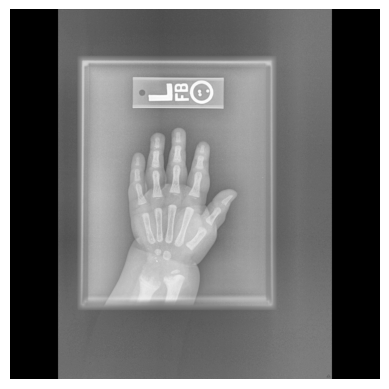

In [ ]:
''' Step2.2: Select you image name (from input folder) and visualize the input example'''
from PedVisionCode.utils import noise_add as vis

IMAGE_NAME = '1473'
vis.vis_image(IMAGE_NAME)

---
---
**STEPS 2.3 & 2.4: Segment with PedVision and Visualize the Predicted Masks**

> Run the two code cells below (Step 2.3 and Step 2.4) to apply the PedVision model to your selected X-ray image and visualize the predicted segmentation masks.

---
---

In [ ]:
''' Step2.3: Run the test code'''

!python PedVisionCode/main.py\
--test_model y\
--img_name {IMAGE_NAME}

Testing model...
100% 1/1 [00:22<00:00, 22.88s/it]


./PedVisionCode/test_data/input/15553.jpg
Visualizing masks for: 15553


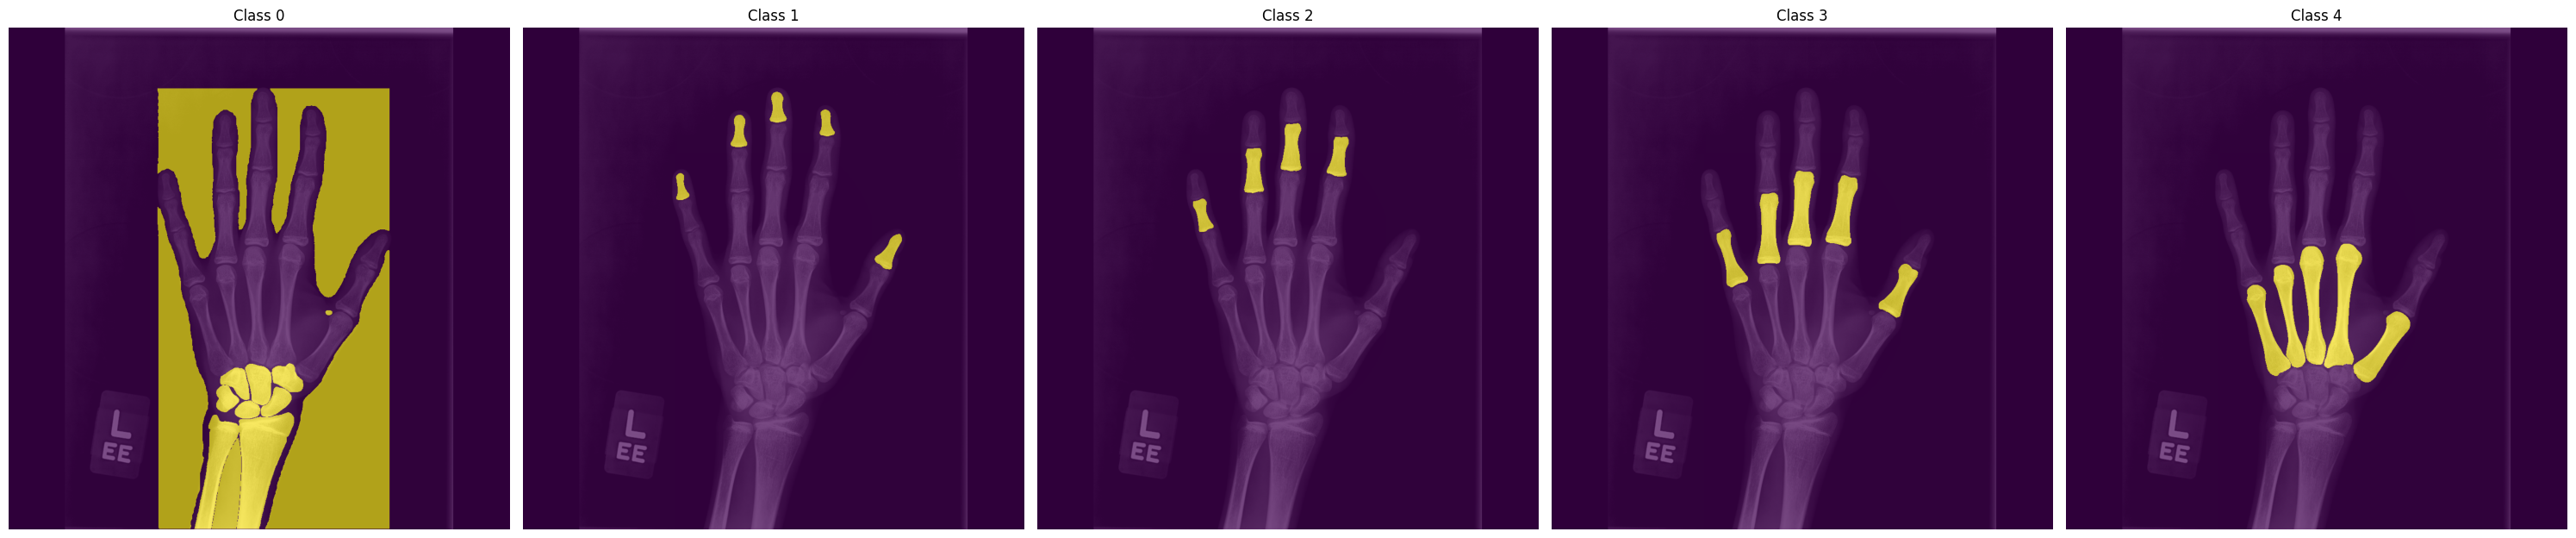

In [ ]:
''' Step2.4: Visalize the predicted masks'''


from PedVisionCode.utils import noise_add as vis

img_path = f'./PedVisionCode/test_data/input/{IMAGE_NAME}.jpg'
print(img_path)
vis.visualize_masks(img_path)

#### **STEPS 2.5 to 2.8: Noise Introduction**

---
---
The code cells below (Steps 2.5 to 2.8) will guide you through the process of adding noise to the selected X-ray image, which will serve as the input for the pipeline—specifically, for the ROI detection step (see the PedVision scheme in the figure below). Once adding noise, you  will save the modified image, run the PedVision model and visualize the predicted segmentation masks.




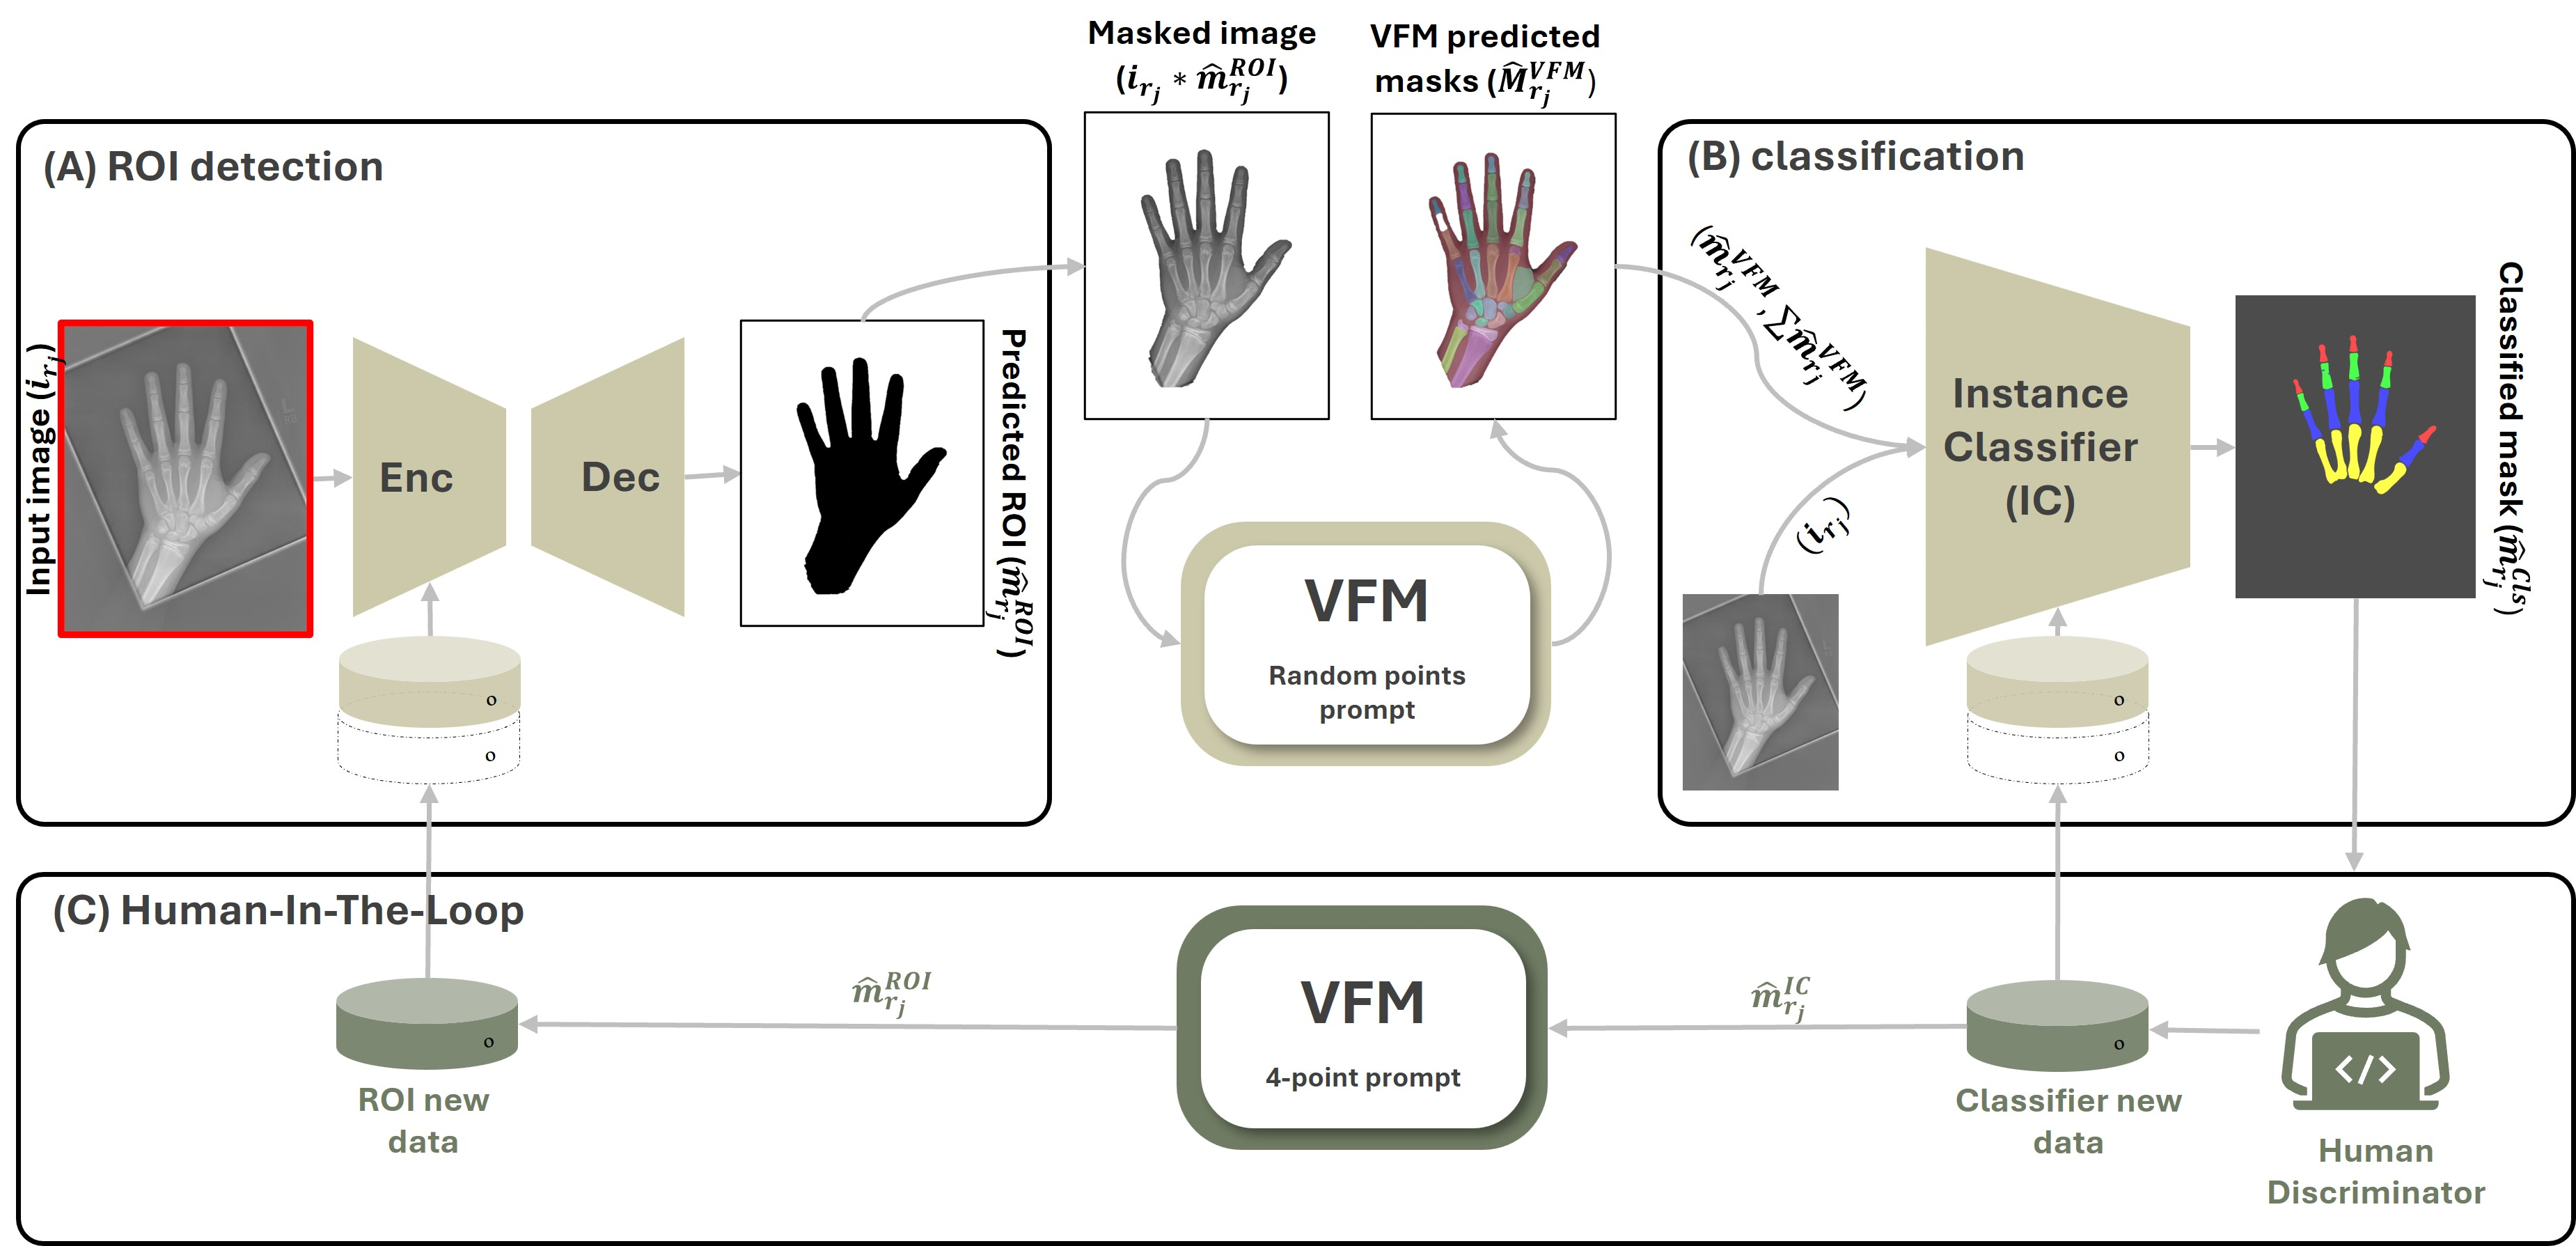

---
---


---
---

**STEP 2.5: Effects of Noise and Noise Levels**

> Run the code cell below (Step 2.5) by specifying the noise type and the desired noise level to explore/visualize how different types and amounts of noise affect the X-ray image.


> Examples:

> * **noise_add.show_noise_examples (image, 'salt_pepper', 60)** - This applies 60% salt&pepper noise to the image.

> * **noise_add.show_noise_examples (image, 'salt_pepper', [90, 60, 20])** - This visualizes the impact of varying noise levels (90%, 60%, and 20%) on the image.

>* **compare_all_noise_types (image, 60)** - This compares the effects of all noise types at 60% noise level.

> The available noise types:

>* 'gaussian'
>* 'salt_pepper'
>* 'motion'

> The noise level can be set between 0 (no noise) and 100 (maximum noise).
---
---

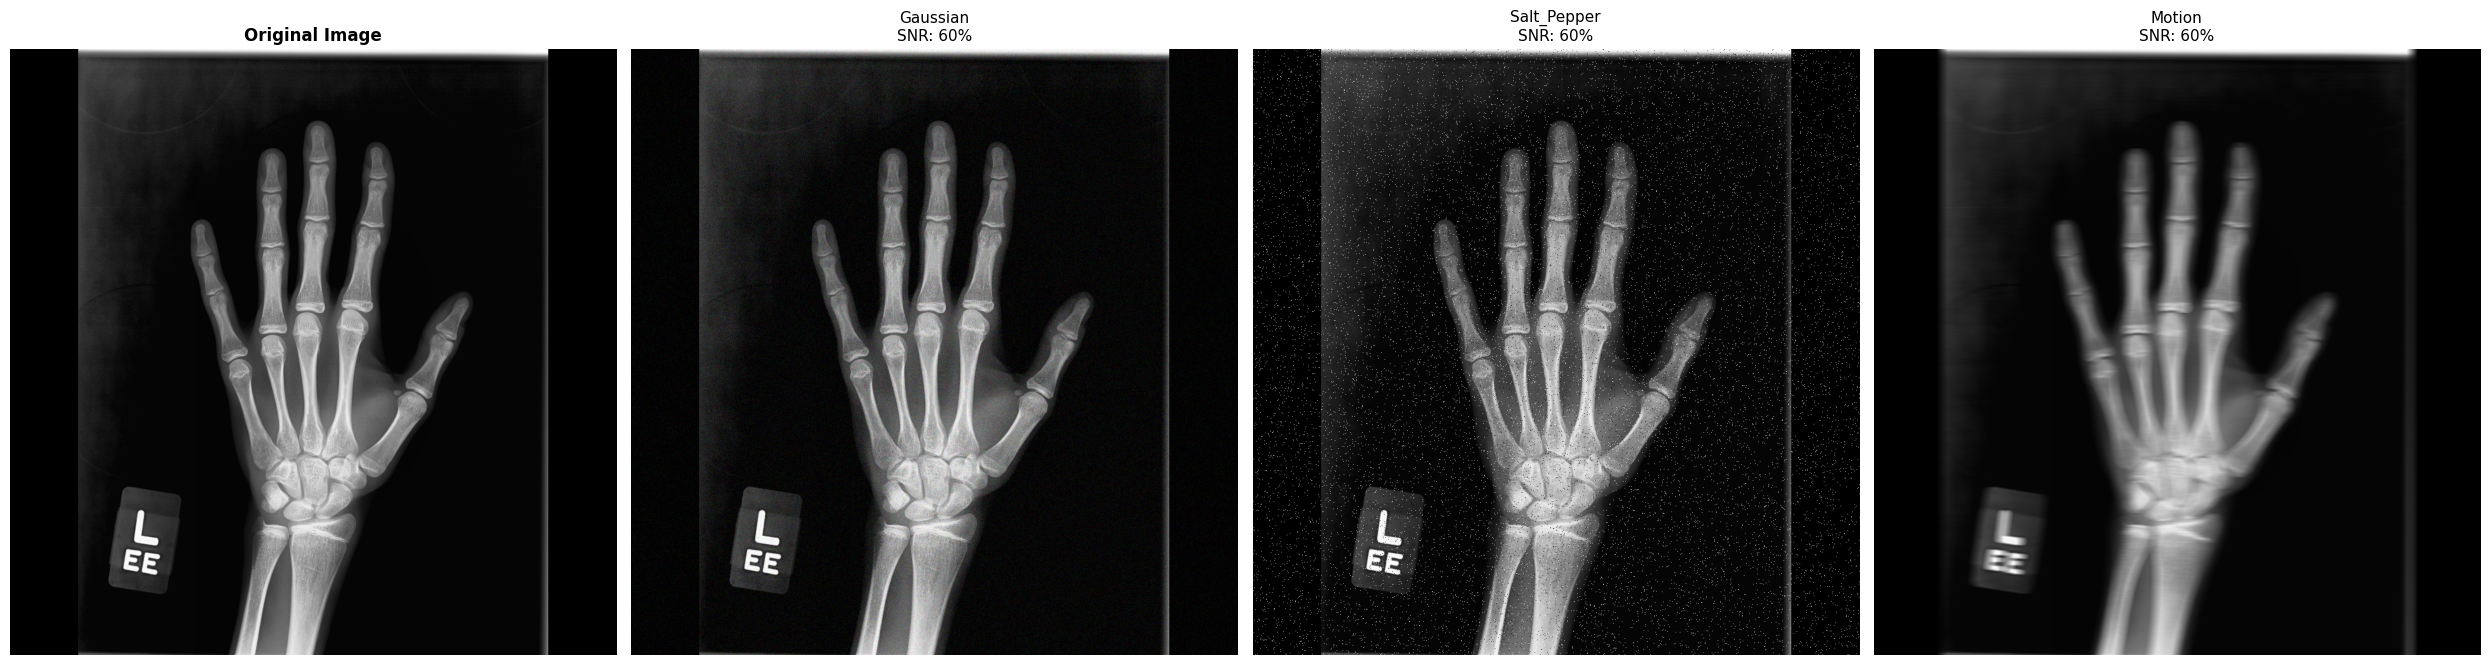

Compared all noise types at 60% SNR
Noise types: Gaussian, Salt & Pepper, Motion


In [ ]:
''' Step2.5: Explore Noise and Motion effects (if you want)'''

from PedVisionCode.utils import noise_add
import cv2

image1 = cv2.imread(img_path)
# noise_add.show_noise_examples(image1, 'gaussian', [90, 70, 50, 20])
# noise_add.show_noise_examples(image1, 'salt_pepper', 60)
# noise_add.quick_noise_demo(image1, 'motion')
noise_add.compare_all_noise_types(image1, 60)

---
---

**STEP 2.6: Save the Noise-Added Image**

> Run the code cell below (Step 2.6) by specifying the noise type and the desired noise level to save the noise-added image.

---
---

In [ ]:
''' Step2.6: Save a noisy image by changing type and rate of noise/motion'''

NOISE_TYPE = 'salt_pepper' # "gaussian", "salt_pepper" or "Motion"
NOISE_RATE = 60 # %
noise_add.save_noise_image(f'./PedVisionCode/test_data/input/{IMAGE_NAME}.jpg', './PedVisionCode/test_data/input/' , NOISE_TYPE, NOISE_RATE)

Processing image: 15553
Noise type: salt_pepper
SNR levels: [60]
Grayscale output: True
✓ Saved: 15553_salt_pepper_N_lvl_60.jpg

Completed! Saved 1 images to ./PedVisionCode/test_data/input/


['./PedVisionCode/test_data/input/15553_salt_pepper_N_lvl_60.jpg']

---
---
**STEPS 2.7 & 2.8: Segment with PedVision and Visualize the Predicted Masks**

> Run the two code cells below (Step 2.7 and Step 2.8) to apply the PedVision model to your noise-added image and visualize the predicted segmentation masks.

---
---

In [ ]:
''' Step2.7: Run the test code for the noisy image'''

!python PedVisionCode/main.py --test_model y\
--img_name {IMAGE_NAME}_{NOISE_TYPE}_N_lvl_{NOISE_RATE}

Testing model...
100% 1/1 [00:22<00:00, 22.86s/it]


Visualizing masks for: 15553_salt_pepper_N_lvl_60


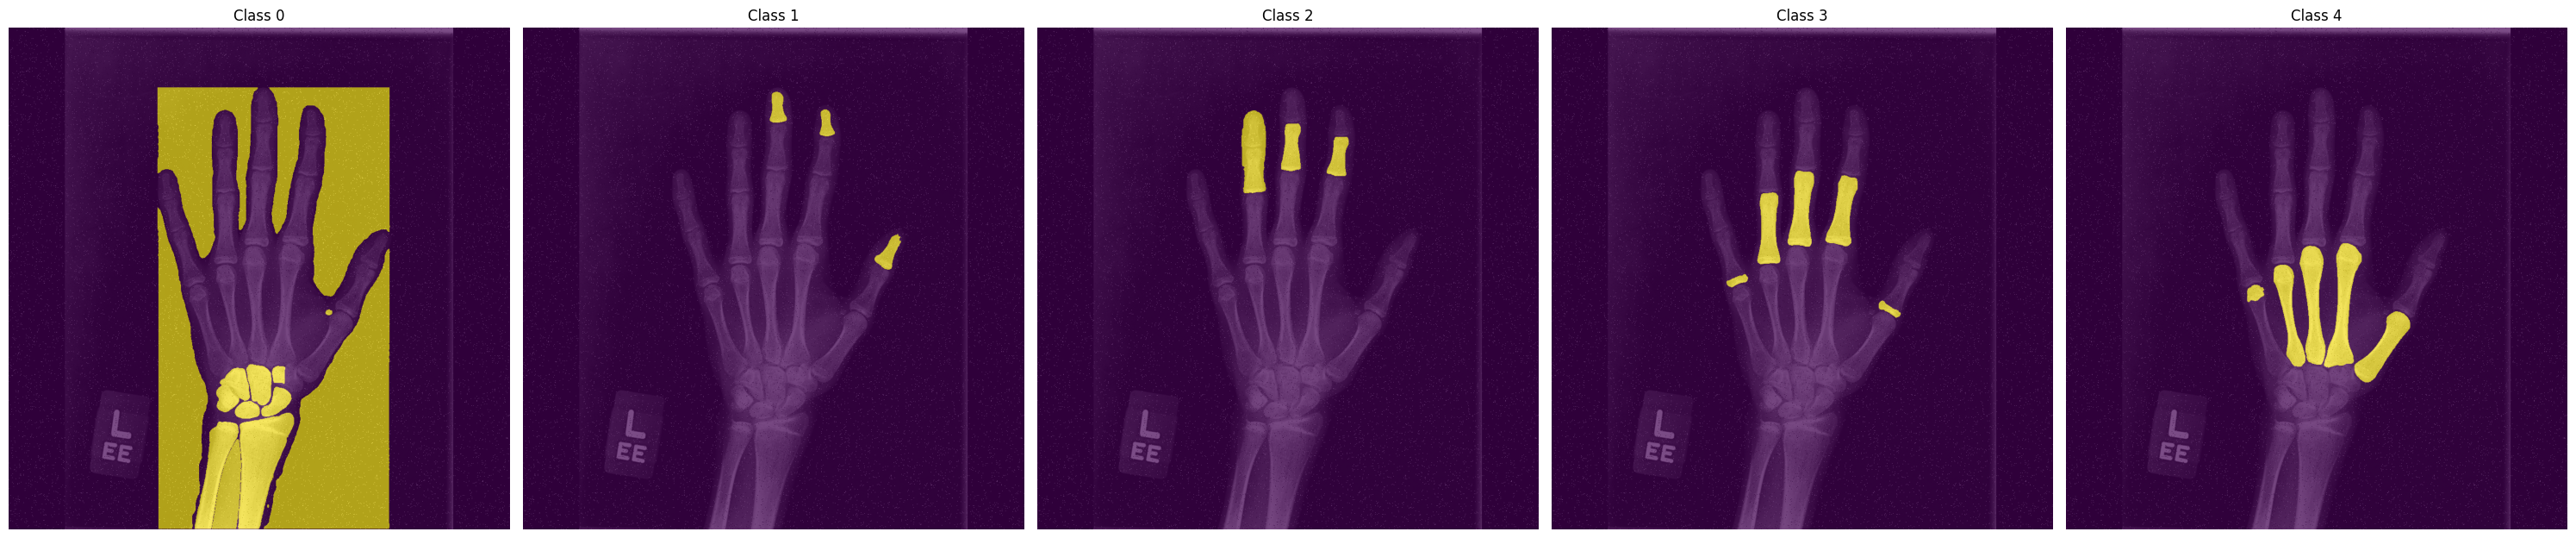

In [ ]:
''' Step2.8: And see the results'''

img_path = f'./PedVisionCode/test_data/input/{IMAGE_NAME}_{NOISE_TYPE}_N_lvl_{NOISE_RATE}.jpg'
noise_add.visualize_masks(img_path)


#### **STEPS 2.9 to 2.10: Noise & VFM Parameters Modification**



---
---
If you notice that the PedVision model’s performance decreases on noisy images, you can use the code cells below (Steps 2.9 to 2.10) to experiment with the VFM model (i.e., SAM) parameters and potentially improve the results.

These steps allow you to adjust key parameters and observe their effect on segmentation performance.

The VFM parameters that can be modified:

* **points_per_side (int or None):** Number of points sampled per side of the image (total points = points_per_side²). If set to None, an explicit point grid must be provided.
* **pred_iou_thresh (float):** Threshold (between 0 and 1) that filters masks based on the model’s predicted quality.

* **stability_score_thresh (float):** Threshold (between 0 and 1) that filters masks based on their stability under binarization changes.

* **crop_n_layers (int):** If >0, additional mask predictions are run on cropped sections of the image. Each layer uses 2^i image crops.

You can refer to the VFM parameters used earlier in Step 2.1 for comparison.

To better understand these parameters and how they influence the model’s behavior, we encourage you to consult reference [1].

**References**

**[1]** Kirillov, A., et al. Segment anything. in Proceedings of the IEEE/CVF International Conference on Computer Vision. 2023.




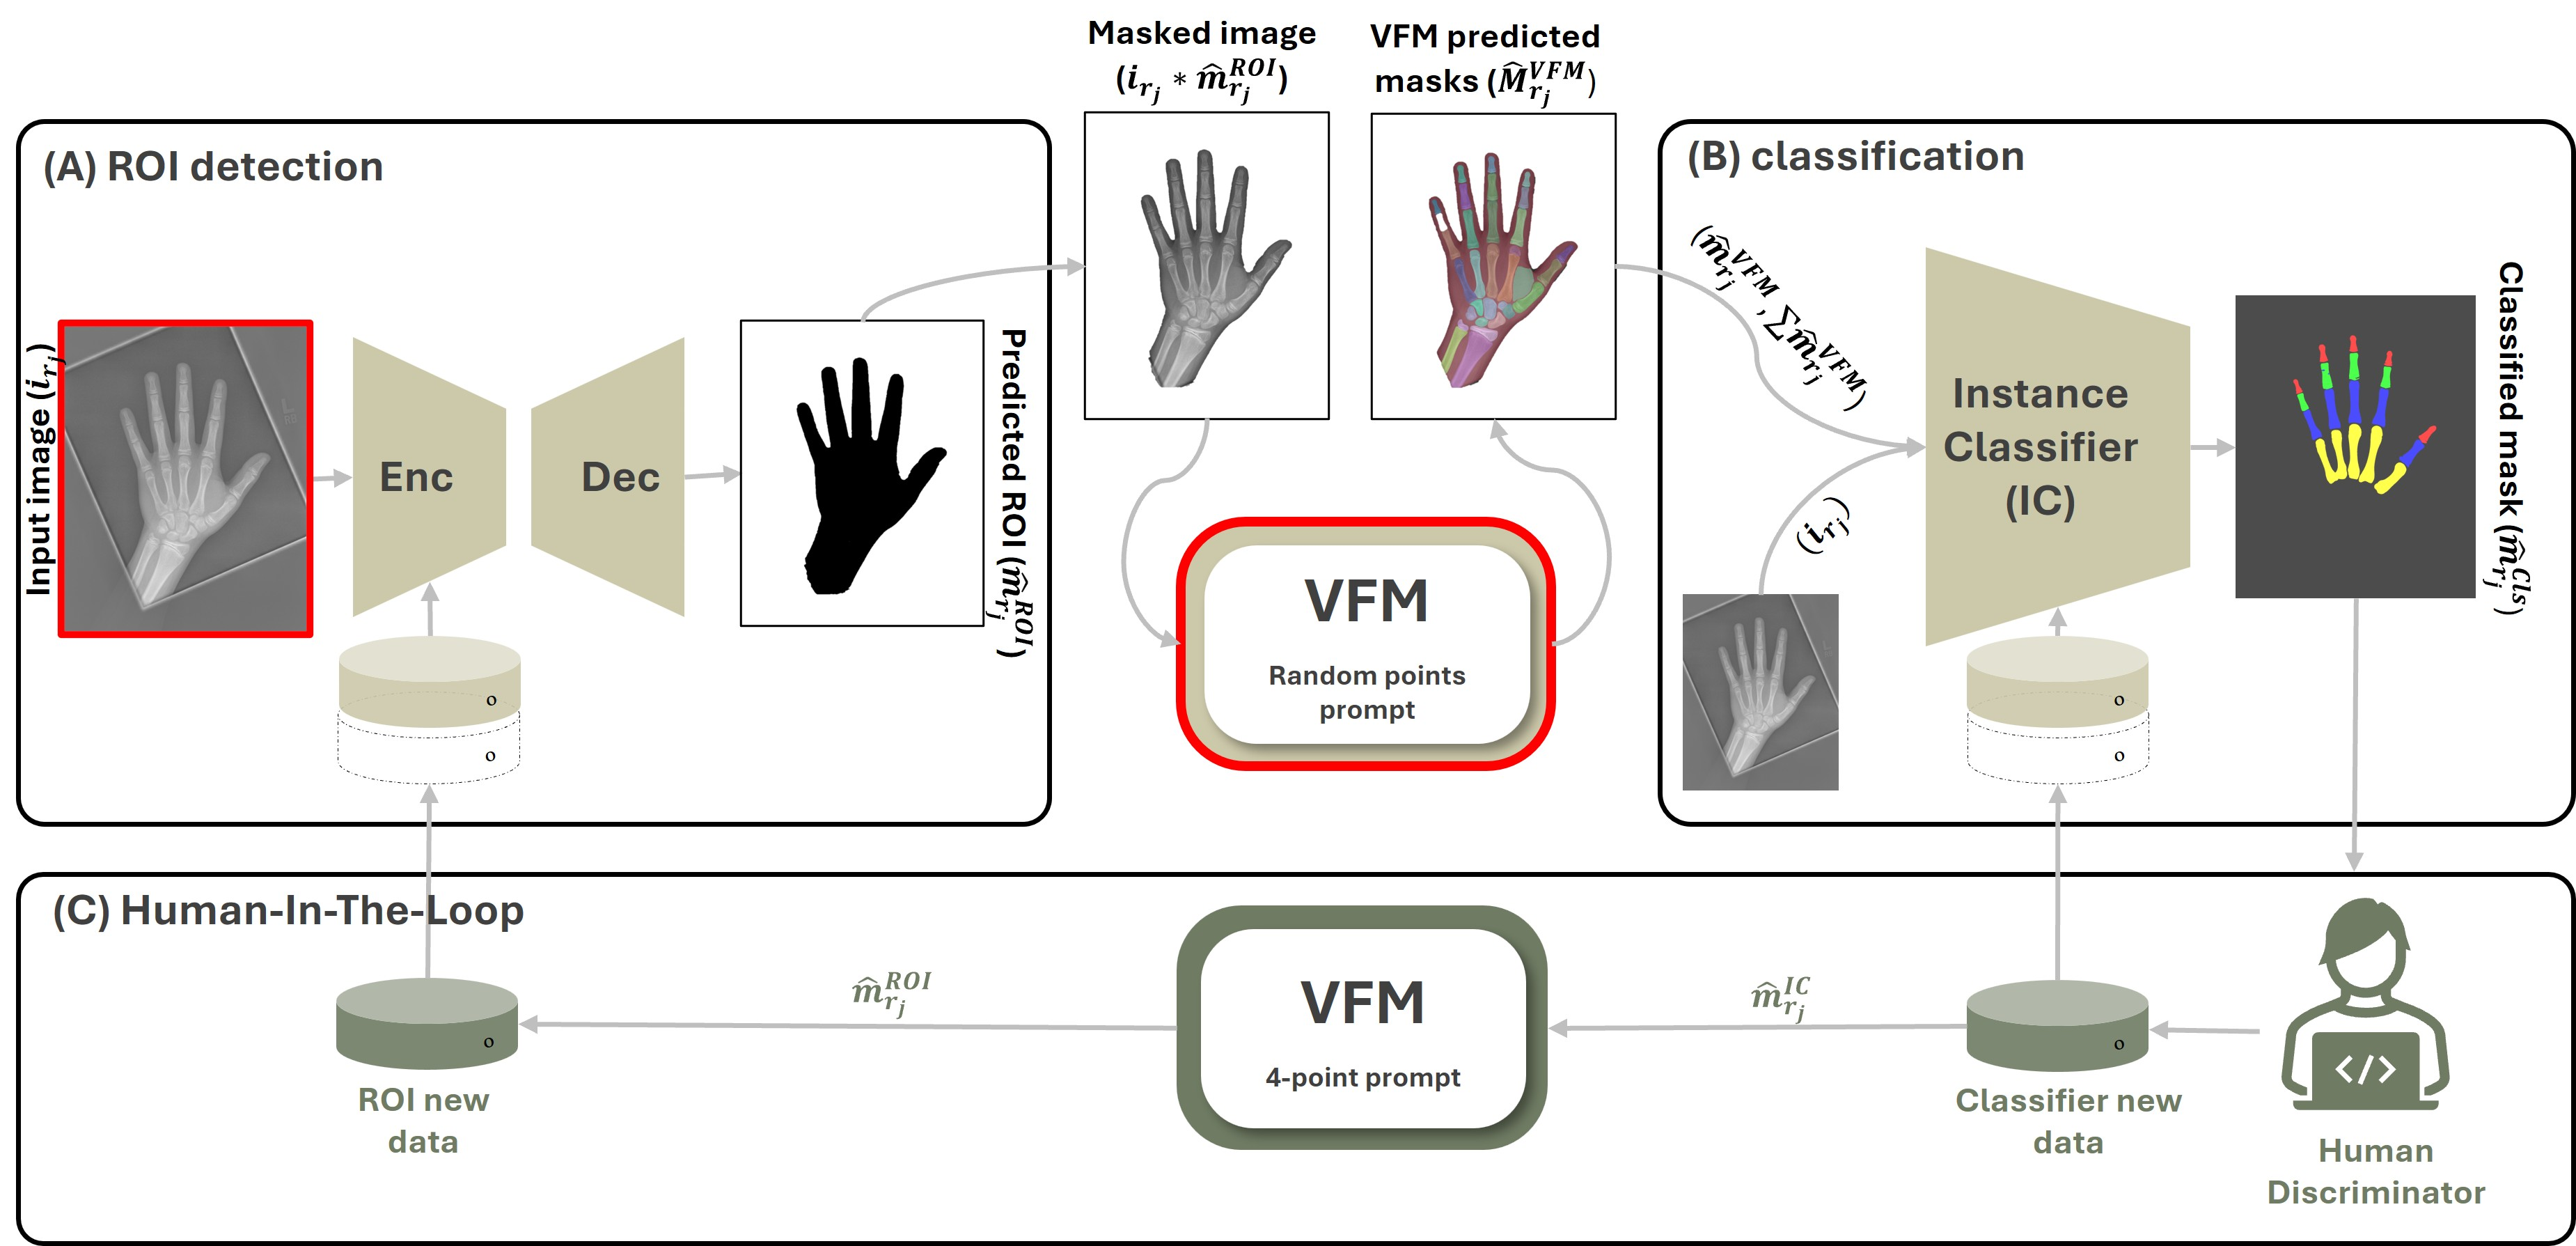

---
---
**STEP 2.9: Modify VFM Parameters**

> Run the code cell below (Step 2.9) by setting the VFM model parameters:
* --points_per_side,
* --stability_score_thresh (between 0 and 1),
* --crop_n_layers (int),
* --pred_iou_thresh (between 0 and 1).

> You can vary one at a time to see the effects of each or try their combinations.
---
---

In [ ]:
'''Step2.9: Change the VFM parameters'''
'''
SAM parameters:
By changing the pipeline configues, we might be able to improve the results

        - points_per_side (int or None): The number of points to be sampled
                    along one side of the image. The total number of points is
                    points_per_side**2. If None, 'point_grids' must provide explicit
                    point sampling. (Default: 32)
        - pred_iou_thresh (float): A filtering threshold in [0,1], using the
                    model's predicted mask quality.(Default: 0.88)
        - stability_score_thresh (float): A filtering threshold in [0,1], using
                    the stability of the mask under changes to the cutoff used to binarize
                    the model's mask predictions.(Default: 0.95)
        - crop_n_layers (int): If >0, mask prediction will be run again on
            crops of the image. Sets the number of layers to run, where each
            layer has 2**i_layer number of image crops.(Default: 1)
'''
!python PedVisionCode/main.py --test_model y\
--img_name {IMAGE_NAME}_{NOISE_TYPE}_N_lvl_{NOISE_RATE}\
--points_per_side=42\
# --crop_n_layers=1\
# --pred_iou_thresh=0.88\
# --stability_score_thresh=0.95\

Testing model...
100% 1/1 [00:29<00:00, 29.08s/it]


---
---
**STEP 2.10: Run the Modified PedVision and Visualize the Predicted Segmentation Masks**

> Run the code cell below (Step 2.10) to apply the modified PedVision model (with your chosen VFM parameters) to the noisy image and visualize the resulting segmentation masks.

---
---

Visualizing masks for: 1998_salt_pepper_N_lvl_40


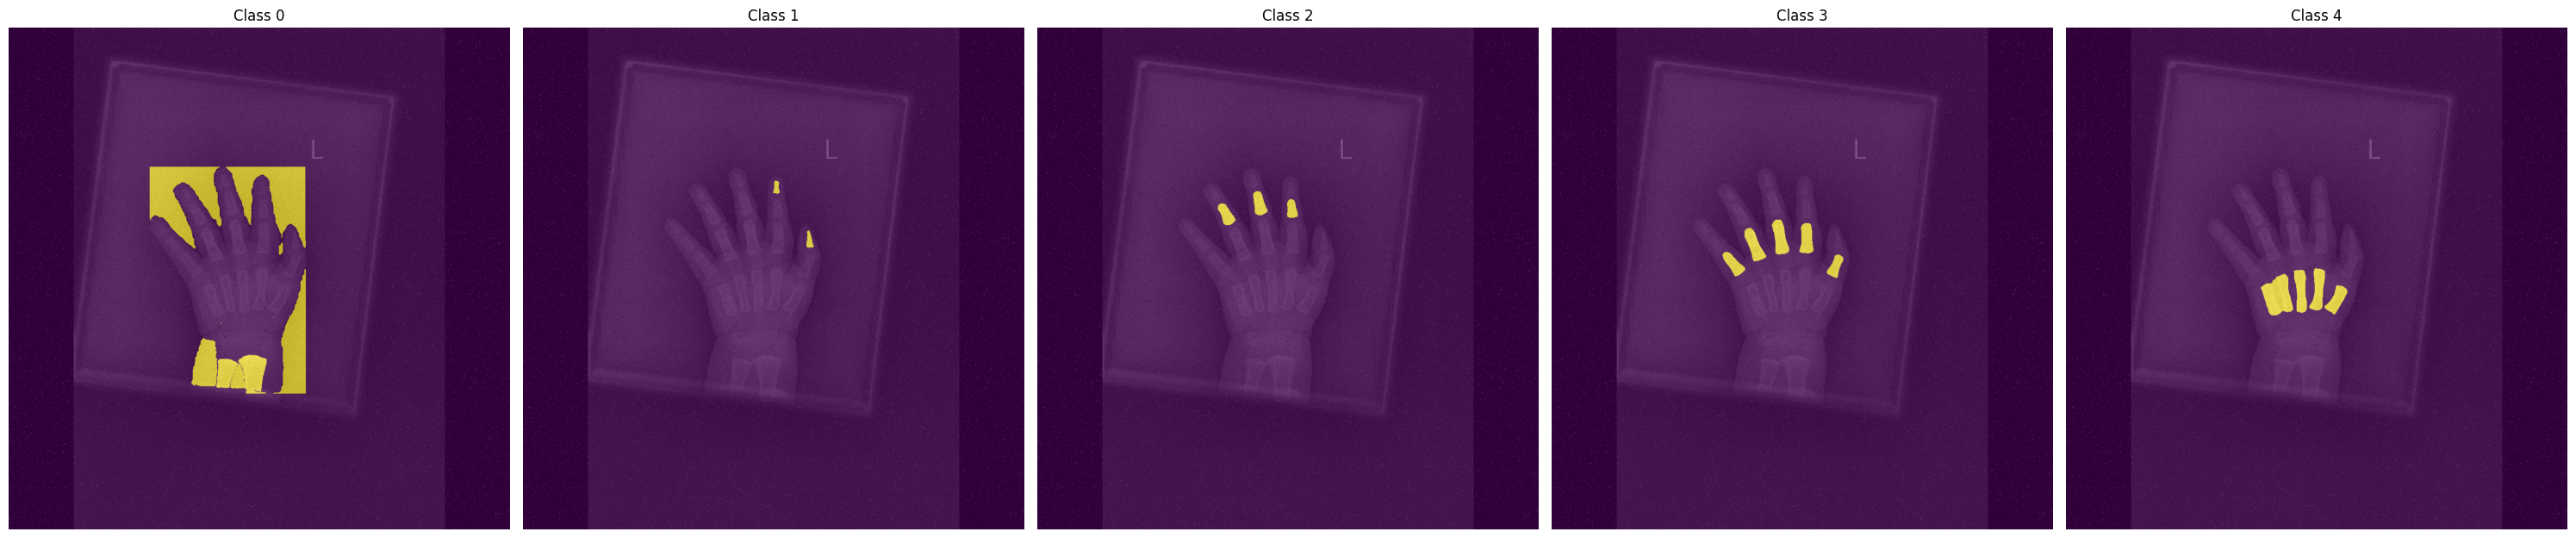

In [ ]:
'''Step 2.10: See the performance of the modified PedVision model on the noisy image'''

noise_add.visualize_masks(f'./PedVisionCode/test_data/input/{IMAGE_NAME}_{NOISE_TYPE}_N_lvl_{NOISE_RATE}.jpg')

```
```

### **3. Experiments with Non-VFM-Based Models**
In this section, you will explore a set of benchmark models that do not rely on the VFM module to perform semantic segmentation of hand bones—including the metacarpals and the proximal, middle, and distal phalanges—from X-ray images. The goal is to compare the performance of these benchmark models with that of the PedVision model.

The benchmark models include:

* U-Net (Encoder: ResNet34) [1, 2],
* U-Net (Encoder: ResNet101) [2],
* DeepLabV3+ (Encoder: ResNet34) [3],
* DeepLabV3+ (Encoder: ResNet101) [3],
* SegFormer (Encoder: mit_b0) [4],
* SegFormer (Encoder: mit_b1) [4],
* SegFormer (Encoder: mit_b2) [4],
* SegFormer (Encoder: mit_b3) [4].

Some discussion points:

* **What do you observe when you run each of these benchmark models separately?**

* **How does the segmentation performance of PedVision compare?**

* **Are any of these models more accurate than PedVision?**

* **How do they handle different types and levels of noise? Is PedVision more robust in noisy or artifact-heavy scenarios?**

Take your time to experiment and reflect on these questions as you go through the exercises.

**References**

**[1]** Ronneberger, O., P. Fischer, and T. Brox. U-net: Convolutional networks for biomedical image segmentation. in Medical image computing and computer-assisted intervention–MICCAI 2015: 18th international conference, Munich, Germany, October 5-9, 2015, proceedings, part III 18. 2015. Springer.

**[2]** He, K., et al. Deep residual learning for image recognition. in Proceedings of the IEEE conference on computer vision and pattern recognition. 2016.

**[3]** Chen, L.-C., et al., Rethinking atrous convolution for semantic image segmentation. arXiv. arXiv preprint arXiv:1706.05587, 2017. 5.

**[4]** Xie, E., et al., SegFormer: Simple and efficient design for semantic segmentation with transformers. Advances in neural information processing systems, 2021. 34: p. 12077-12090.




```
```

---
---
**STEPS 3.1 & 3.2: Initiate the Test Set for Non-VFM-Based Models and Select the Model**
> Run the two code cells below (Steps 3.1 and 3.2) to first initiate the test set, which will be used for the benchmark (non-VFM) models. Then, in Step 3.2, you can select and apply the model you would like to evaluate.

---
---

In [ ]:
'''Step3.1: Initiate the test set for non-VFM based models.'''

from PedVisionCode.utils import non_vfm
from torch.utils.data import DataLoader
import torch

image_dir = "/content/PedVision/PedVisionCode/test_data/input/"
custom_transform = non_vfm.CustomTransformTest()
dataset_te = non_vfm.CustomDataset(image_dir, transform=custom_transform)
test_loader = DataLoader(dataset_te, batch_size=1, shuffle=True)


In [ ]:
'''Step3.2: Select one of the following non-VFM based models to test'''

# model_name = 'deeplab34'
# model_name = 'deeplab101'
# model_name = 'unet_res34'
# model_name = 'unet_res101'
# model_name = 'segformer_mitb0'
# model_name = 'segformer_mitb1'
# model_name = 'segformer_mitb2'
model_name = 'segformer_mitb3'

---
---
**STEP 3.3: Set Up Your Selected Model**
> Run the code cell below (Step 3.3) to initialize and prepare the model you selected in the previous step. This will load the model architecture and weights so it is ready for evaluation on the test set.
---
---

In [ ]:
'''Step3.3: Run this cell to donwload the model and initiate it'''

if model_name == 'deeplab34':
    !wget "https://www.dropbox.com/scl/fi/nw4vtzmlfxtjn0lu1l62m/DeepLabV3Plus_resnet34_best_model.pth?rlkey=qixdcwdps3gxrd253qdbflf3v&st=1wi8hwob&dl=1" -O PedVisionCode/saved_models/DeepLabV3Plus_resnet34_best_model.pth

elif model_name == 'deeplab101':
    !wget "https://www.dropbox.com/scl/fi/omef5qou8fo50nktwyqk6/Deeplapv3p_res101_best_model.pth?rlkey=i4y1uywekm4s6tfciv3wxywiw&st=oq5jyjkz&dl=1" -O PedVisionCode/saved_models/Deeplapv3p_res101_best_model.pth

elif model_name == 'unet_res34':
    !wget "https://www.dropbox.com/scl/fi/j375w7rjqx7x0w18c1t09/Unet_res34.pth?rlkey=epomx2uloprl71y0rh4go6h8j&st=j91wsim7&dl=1" -O PedVisionCode/saved_models/Unet_res34.pth

elif model_name == 'unet_res101':
    !wget "https://www.dropbox.com/scl/fi/jc1zod78qtm5pnjrvu77u/Unet_res101.pth?rlkey=5fgq6oqbr3f1q8nnecb77j7lf&st=n3hv56kl&dl=1" -O PedVisionCode/saved_models/Unet_res101.pth

elif model_name == 'segformer_mitb0':
    !wget "https://www.dropbox.com/scl/fi/tlowi0405ovrrs0vdz4ic/Segformer_mitb0.pth?rlkey=hagjaz2koa93afgrrvu56gkpn&st=t0lwm7jt&dl=1" -O PedVisionCode/saved_models/Segformer_mitb0.pth

elif model_name == 'segformer_mitb1':
    !wget "https://www.dropbox.com/scl/fi/nv0ra1xko2y8t4b1bt97c/Segformer_mitb1.pth?rlkey=yk7yrdtj878o8usof4qublv1m&st=xcead696&dl=1" -O PedVisionCode/saved_models/Segformer_mitb1.pth

elif model_name == 'segformer_mitb2':
    !wget "https://www.dropbox.com/scl/fi/5mf0fv4htb8vehcsfl6d3/Segformer_mitb2.pth?rlkey=f2df0pv4bo0a5v2zmpfvpanhd&st=wygqqi50&dl=1" -O PedVisionCode/saved_models/Segformer_mitb2.pth

elif model_name == 'segformer_mitb3':
    !wget "https://www.dropbox.com/scl/fi/07tggc1sy54oqwlv73evb/Segformer_mitb3.pth?rlkey=rc6nsw2j14fytkxdkjrispc36&st=kkla9ac7&dl=1" -O PedVisionCode/saved_models/Segformer_mitb3.pth

model = non_vfm.model_selection(model_name)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

--2025-07-02 10:37:25--  https://www.dropbox.com/scl/fi/07tggc1sy54oqwlv73evb/Segformer_mitb3.pth?rlkey=rc6nsw2j14fytkxdkjrispc36&st=kkla9ac7&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uca22556e8206d562aa86595fd9c.dl.dropboxusercontent.com/cd/0/inline/CstgL-LL90arMvktCrl7mddx-gf-LfAr98WJ9AlPTiHSVLGzQAO5QJ8hVqZ99TtoWwBz0koDmfspNJEv7l_mEBGMxjltnjIkezkMCymWdH2H64rv8pwppBi8DlFmOeyQmXjlWpY_fsfnr4e-1lYTZL4X/file?dl=1# [following]
--2025-07-02 10:37:25--  https://uca22556e8206d562aa86595fd9c.dl.dropboxusercontent.com/cd/0/inline/CstgL-LL90arMvktCrl7mddx-gf-LfAr98WJ9AlPTiHSVLGzQAO5QJ8hVqZ99TtoWwBz0koDmfspNJEv7l_mEBGMxjltnjIkezkMCymWdH2H64rv8pwppBi8DlFmOeyQmXjlWpY_fsfnr4e-1lYTZL4X/file?dl=1
Resolving uca22556e8206d562aa86595fd9c.dl.dropboxusercontent.com (uca22556e8206d562aa86595fd9c.dl.dropboxuserco

Segformer(
  (encoder): MixVisionTransformerEncoder(
    (patch_embed1): OverlapPatchEmbed(
      (proj): Conv2d(1, 64, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
      (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    )
    (patch_embed2): OverlapPatchEmbed(
      (proj): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    )
    (patch_embed3): OverlapPatchEmbed(
      (proj): Conv2d(128, 320, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
    )
    (patch_embed4): OverlapPatchEmbed(
      (proj): Conv2d(320, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
    )
    (block1): Sequential(
      (0): Block(
        (norm1): LayerNorm((64,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (q): Linear(in_featur

---
---
**STEP 3.4: Apply Your Selected Model to the Test Set**
> Run the code cell below (Step 3.4) to evaluate your selected non-VFM-based model on the test set. This will generate the predicted segmentation masks and allow you to assess the model's performance.

---
---

In [ ]:
'''Step3.4: Predict the test set'''

custom_transform = non_vfm.CustomTransformTest()
dataset_te = non_vfm.CustomDataset(image_dir, transform=custom_transform)
test_loader = DataLoader(dataset_te, batch_size=1, shuffle=False)

outputs, names = non_vfm.test_model(model, test_loader, device)
print('\n')
for i in range(len(outputs)):
    print(i,'->', names[i])

100%|██████████| 9/9 [00:02<00:00,  3.16it/s]



0 -> 15553_gaussian_N_lvl_60.jpg
1 -> 1998_salt_pepper_N_lvl_40.jpg
2 -> 1998_salt_pepper_N_lvl_30.jpg
3 -> 1473.jpg
4 -> 1998.jpg
5 -> 1473_gaussian_N_lvl_30.jpg
6 -> 15553_salt_pepper_N_lvl_60.jpg
7 -> 2428.jpg
8 -> 15553.jpg


---
---
**STEP 3.5: Visualize the Segmentation Masks for a Selected Test Image**
> Run the code cell below (Step 3.5) to visualize the segmentation masks predicted by your selected model. You can change the **case_num** parameter in the code cell below to choose which test image to display. To find the available case numbers, refer to the printed output from the previous step. It lists the test image filenames along with their corresponding case IDs.
---
---

15553_salt_pepper_N_lvl_60.jpg


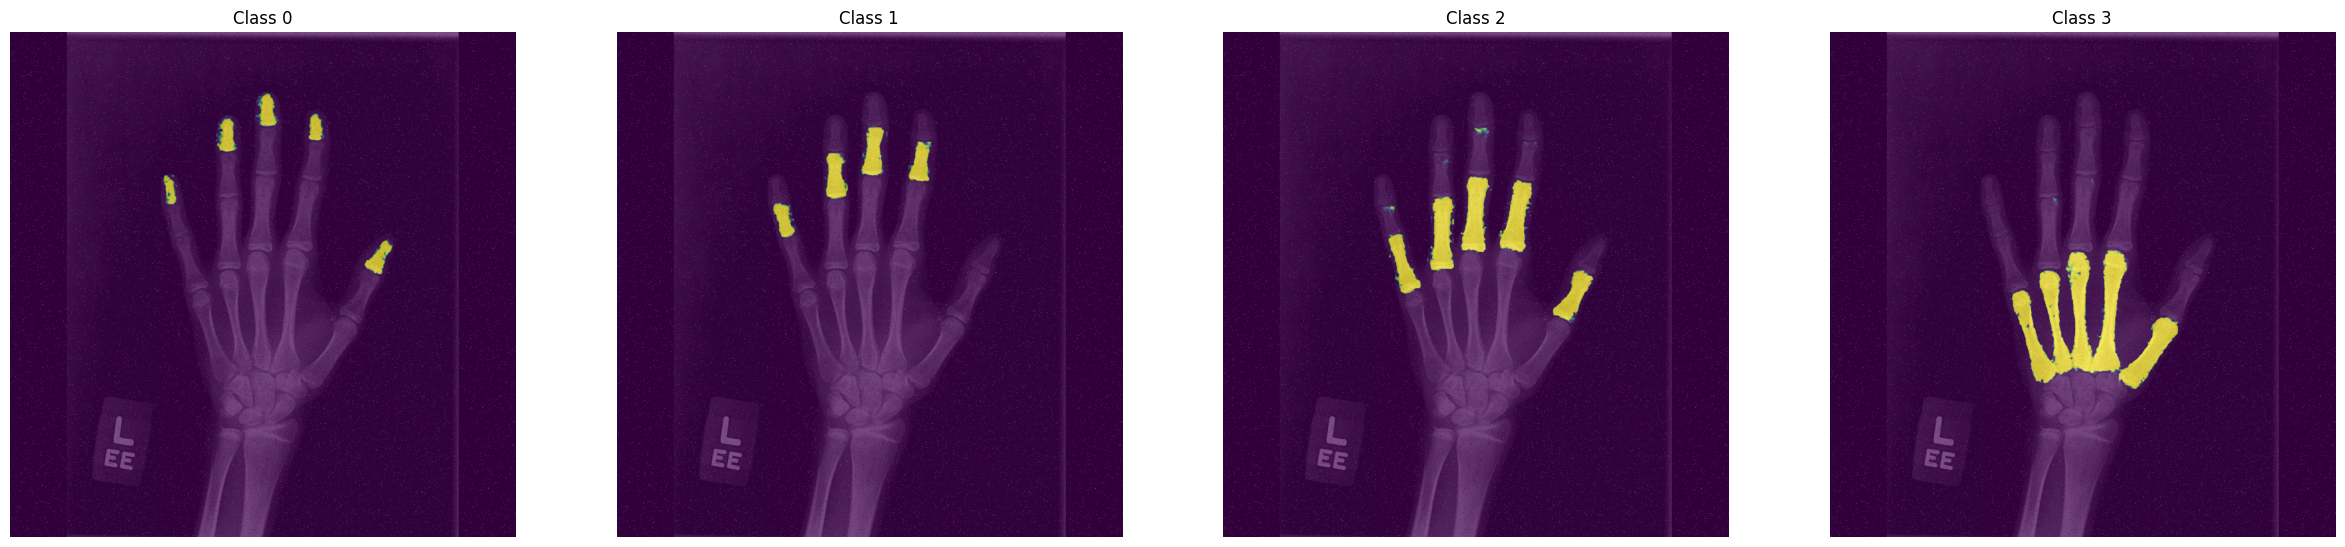

In [ ]:
'''Step3.5: See the results for different images by selecting case_num from previous cell'''

non_vfm.img_show(image_dir, names, outputs, case_num=6)